# Descriptive Analytics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
dataset = pd.read_csv('dataset.csv')
dataset

,Item Particulars,Budgeted Cost (INR),Actual Cost (INR),Variance (Budgeted Cost - Actual Cost),Reason for Variance,Cost Performance Index
0,Supply of Tower & Tower Testing,"96,75,90,529.51","96,84,97,843.60","-9,07,314.09",Material Related,0.999063
1,Supply of other materials,"86,38,73,236.61","94,85,30,410.39","-8,46,57,173.78",Currency Fluctuations,0.910749
2,Survey,"1,49,31,000.00","90,01,485.15","59,29,514.85",Contractual Complexity,1.658726
3,Soil Invetsigation,"1,26,33,721.58","1,49,11,092.00","-22,77,370.42",Land Acquisition Issues,0.847270
4,Bush clearing,"40,24,070.40","64,30,297.89","-24,06,227.49",Land Acquisition Issues,0.625798
...,...,...,...,...,...,...
499,Stringing,"8,87,98,514.18","9,77,76,139.76","-89,77,625.58",Labour Related,0.908182
500,Store,"4,76,45,732.88","6,33,31,360.29","-1,56,85,627.41",Compliances Related,0.752324
501,Overheads,"18,27,13,079.79","25,57,10,210.42","-7,29,97,130.63",Cash Flow and Financial Difficulties,0.714532
502,Client obligaitons,"4,27,71,047.94","4,86,15,777.04","-58,44,729.11",Design Related,0.879777


Summarizing Dataset

In [ ]:
print(dataset.shape) #no. of rows and columns
print(dataset.describe()) #Details of Dataset

(504, 6)
       Cost Performance Index
count              504.000000
mean                 0.891228
std                  0.256944
min                  0.228740
25%                  0.710137
50%                  0.846988
75%                  1.040328
max                  1.733589


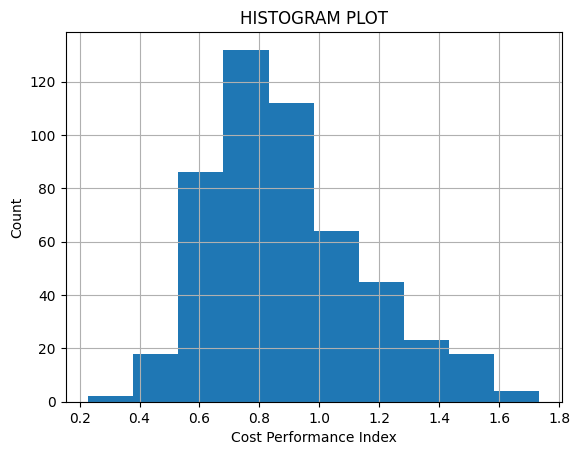

In [ ]:
dataset.hist()
plt.title('HISTOGRAM PLOT')
plt.xlabel("Cost Performance Index")
plt.ylabel("Count")
plt.show()

# Diagnostic Analytics

In [ ]:
print(dataset.groupby("Reason for Variance").size()) #Count of data based on the classes

Reason for Variance
Cash Flow and Financial Difficulties     24
Compliances Related                      48
Contractual Complexity                   24
Currency Fluctuations                    24
Design Related                           24
Labour Related                          216
Land Acquisition Issues                  72
Material Related                         72
dtype: int64


In [ ]:
#create DataFrame
df = pd.DataFrame({'count': [24, 48, 24, 24, 24, 216, 72, 72]})
df.index = ['Cash Flow and Financial Difficulties', 'Compliances Related', 'Contractual Complexity', 'Currency Fluctuations',
            'Design Related', 'Labour Related', 'Land Acquisition Issues', 'Material Related']

#sort DataFrame by count descending
df = df.sort_values(by='count', ascending=False)

#add column to display cumulative percentage
df['cumperc'] = df['count'].cumsum()/df['count'].sum()*100

#view DataFrame
df

,count,cumperc
Labour Related,216,42.857143
Land Acquisition Issues,72,57.142857
Material Related,72,71.428571
Compliances Related,48,80.952381
Cash Flow and Financial Difficulties,24,85.714286
Contractual Complexity,24,90.476190
Currency Fluctuations,24,95.238095
Design Related,24,100.000000


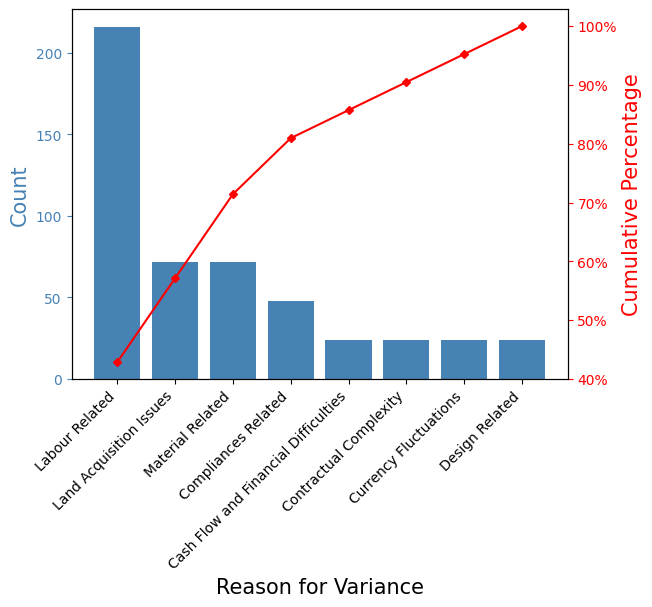

In [ ]:
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['count'], color=color1)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Reason for Variance', color='k', fontsize=15)
ax.set_ylabel('Count', color='steelblue', fontsize=15)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['cumperc'], color=color2, marker="D", ms=line_size,)
ax2.set_ylabel('Cumulative Percentage', color='r', fontsize=15)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

# Predictive Analytics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df=pd.read_csv('dataset.csv')
df.head()

,Item Particulars,Budgeted Cost (INR),Actual Cost (INR),Variance (Budgeted Cost - Actual Cost),Reason for Variance,Cost Performance Index
0,Supply of Tower & Tower Testing,"96,75,90,529.51","96,84,97,843.60","-9,07,314.09",Material Related,0.999063
1,Supply of other materials,"86,38,73,236.61","94,85,30,410.39","-8,46,57,173.78",Currency Fluctuations,0.910749
2,Survey,"1,49,31,000.00","90,01,485.15","59,29,514.85",Contractual Complexity,1.658726
3,Soil Invetsigation,"1,26,33,721.58","1,49,11,092.00","-22,77,370.42",Land Acquisition Issues,0.847270
4,Bush clearing,"40,24,070.40","64,30,297.89","-24,06,227.49",Land Acquisition Issues,0.625798


In [ ]:
df.tail()

,Item Particulars,Budgeted Cost (INR),Actual Cost (INR),Variance (Budgeted Cost - Actual Cost),Reason for Variance,Cost Performance Index
499,Stringing,"8,87,98,514.18","9,77,76,139.76","-89,77,625.58",Labour Related,0.908182
500,Store,"4,76,45,732.88","6,33,31,360.29","-1,56,85,627.41",Compliances Related,0.752324
501,Overheads,"18,27,13,079.79","25,57,10,210.42","-7,29,97,130.63",Cash Flow and Financial Difficulties,0.714532
502,Client obligaitons,"4,27,71,047.94","4,86,15,777.04","-58,44,729.11",Design Related,0.879777
503,Security 1,"10,35,73,782.46","15,51,78,574.14","-5,16,04,791.68",Labour Related,0.667449


In [ ]:
df.shape

(504, 6)

In [ ]:
df.dtypes

Item Particulars                           object
Budgeted Cost (INR)                        object
Actual Cost (INR)                          object
Variance (Budgeted Cost - Actual Cost)     object
Reason for Variance                        object
Cost Performance Index                    float64
dtype: object

In [ ]:
ReasonList = df['Reason for Variance'].unique()
ReasonList.sort()
print(ReasonList)
ReasonList.dtype

['Cash Flow and Financial Difficulties' 'Compliances Related'
 'Contractual Complexity' 'Currency Fluctuations' 'Design Related'
 'Labour Related' 'Land Acquisition Issues' 'Material Related']


dtype('O')

In [ ]:
#Encoding (representing) Categorical variables as numerical values
ohe=OneHotEncoder()
feature_array = ohe.fit_transform(df[["Reason for Variance"]]).toarray()
print(feature_array)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
feature_labels = ohe.categories_
print(feature_labels)

[array(['Cash Flow and Financial Difficulties', 'Compliances Related',
       'Contractual Complexity', 'Currency Fluctuations',
       'Design Related', 'Labour Related', 'Land Acquisition Issues',
       'Material Related'], dtype=object)]


In [ ]:
features = pd.DataFrame(feature_array,columns=feature_labels)
features

,Cash Flow and Financial Difficulties,Compliances Related,Contractual Complexity,Currency Fluctuations,Design Related,Labour Related,Land Acquisition Issues,Material Related
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
499,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
pd.concat([df,features],axis=1)

,Item Particulars,Budgeted Cost (INR),Actual Cost (INR),Variance (Budgeted Cost - Actual Cost),Reason for Variance,Cost Performance Index,"(Cash Flow and Financial Difficulties,)","(Compliances Related,)","(Contractual Complexity,)","(Currency Fluctuations,)","(Design Related,)","(Labour Related,)","(Land Acquisition Issues,)","(Material Related,)"
0,Supply of Tower & Tower Testing,"96,75,90,529.51","96,84,97,843.60","-9,07,314.09",Material Related,0.999063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Supply of other materials,"86,38,73,236.61","94,85,30,410.39","-8,46,57,173.78",Currency Fluctuations,0.910749,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Survey,"1,49,31,000.00","90,01,485.15","59,29,514.85",Contractual Complexity,1.658726,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Soil Invetsigation,"1,26,33,721.58","1,49,11,092.00","-22,77,370.42",Land Acquisition Issues,0.847270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Bush clearing,"40,24,070.40","64,30,297.89","-24,06,227.49",Land Acquisition Issues,0.625798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Stringing,"8,87,98,514.18","9,77,76,139.76","-89,77,625.58",Labour Related,0.908182,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
500,Store,"4,76,45,732.88","6,33,31,360.29","-1,56,85,627.41",Compliances Related,0.752324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
501,Overheads,"18,27,13,079.79","25,57,10,210.42","-7,29,97,130.63",Cash Flow and Financial Difficulties,0.714532,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,Client obligaitons,"4,27,71,047.94","4,86,15,777.04","-58,44,729.11",Design Related,0.879777,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder

In [ ]:
#Separating the categorical and numerical values into two dataframes
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=df[num]
data_c=df[cat]

In [ ]:
label_encoders = {}
categorical_columns = data_c.columns

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

In [ ]:
data_c

,Item Particulars,Budgeted Cost (INR),Actual Cost (INR),Variance (Budgeted Cost - Actual Cost),Reason for Variance
0,17,503,483,346,7
1,18,481,481,332,3
2,19,33,476,473,2
3,14,21,26,174,6
4,1,327,400,178,6
...,...,...,...,...,...
499,16,473,473,345,5
500,15,318,386,43,1
501,6,122,180,316,0
502,2,303,301,286,4


In [ ]:
frames = [data_c, data_n]
data = pd.concat(frames,axis=1)
data

,Item Particulars,Budgeted Cost (INR),Actual Cost (INR),Variance (Budgeted Cost - Actual Cost),Reason for Variance,Cost Performance Index
0,17,503,483,346,7,0.999063
1,18,481,481,332,3,0.910749
2,19,33,476,473,2,1.658726
3,14,21,26,174,6,0.847270
4,1,327,400,178,6,0.625798
...,...,...,...,...,...,...
499,16,473,473,345,5,0.908182
500,15,318,386,43,1,0.752324
501,6,122,180,316,0,0.714532
502,2,303,301,286,4,0.879777


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Item Particulars                        504 non-null    int64  
 1   Budgeted Cost (INR)                     504 non-null    int64  
 2   Actual Cost (INR)                       504 non-null    int64  
 3   Variance (Budgeted Cost - Actual Cost)  504 non-null    int64  
 4   Reason for Variance                     504 non-null    int64  
 5   Cost Performance Index                  504 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 23.8 KB


In [ ]:
X = data.drop(columns="Cost Performance Index")
y = data["Cost Performance Index"]
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # split 25% test 75 % train

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (378, 5)
X Test  :  (126, 5)
Y Train :  (378,)
Y Test  :  (126,)


In [ ]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
SVR = SVR()

In [ ]:
li = [LR, DTR, RFR, KNR, MLP, SVR]
score = []
for i in li:
    i.fit(X_train,y_train)   #training the model
    ypred = i.predict(X_test) #start to predict
    score.append([i,r2_score(y_test,ypred)])

In [ ]:
Score_df = pd.DataFrame(score)
Score_df.columns = ['Model', 'Score']
Score_df

,Model,Score
0,LinearRegression(),0.467000
1,DecisionTreeRegressor(),0.706670
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.784726
3,KNeighborsRegressor(),0.859905
4,MLPRegressor(),-3.023274
5,SVR(),0.791536


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [ ]:
#Building Model
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(x)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.7755209832457446
Mean Squared Error: 3.130197719779765e-05
R-squared: 0.999524929178816


OOB score ranges from 0 to 1, where 1 indicates perfect accuracy.

MSE the small value (close to zero) suggests that, on average, the model's predictions are very close to the actual values.

R-squared value close to 1 indicates that a large proportion of the variability in the dependent variable has been captured by the model, suggesting a very good fit.

In [ ]:
data

,Item Particulars,Budgeted Cost (INR),Actual Cost (INR),Variance (Budgeted Cost - Actual Cost),Reason for Variance,Cost Performance Index
0,17,503,483,346,7,0.999063
1,18,481,481,332,3,0.910749
2,19,33,476,473,2,1.658726
3,14,21,26,174,6,0.847270
4,1,327,400,178,6,0.625798
...,...,...,...,...,...,...
499,16,473,473,345,5,0.908182
500,15,318,386,43,1,0.752324
501,6,122,180,316,0,0.714532
502,2,303,301,286,4,0.879777


In [ ]:
x=data["Reason for Variance"]
y=data["Cost Performance Index"]
print(x.shape)
print(y.shape)

(504,)
(504,)


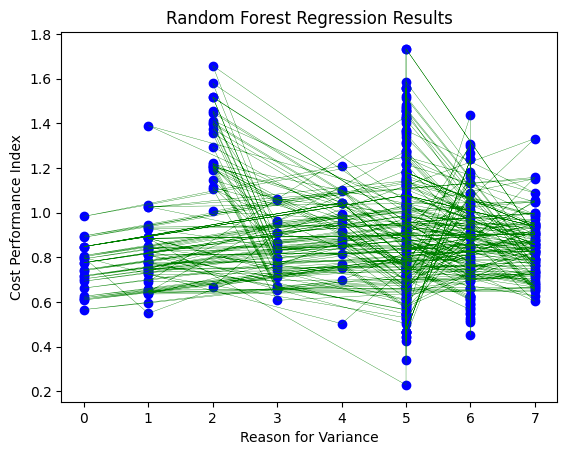

In [ ]:
plt.scatter(x,y,color='blue')
plt.plot(x,y,color='green',linewidth=0.25)
plt.title("Random Forest Regression Results")
plt.xlabel('Reason for Variance')
plt.ylabel('Cost Performance Index')
plt.show()

**Reason for Variance Legend**

0: Cash Flow and Financial Difficulties

1: Compliances Related

2: Contractual Complexity

3: Currency Fluctuations

4: Design Related

5: Labour Related

6: Land Acquisition Issues

7: Material Related

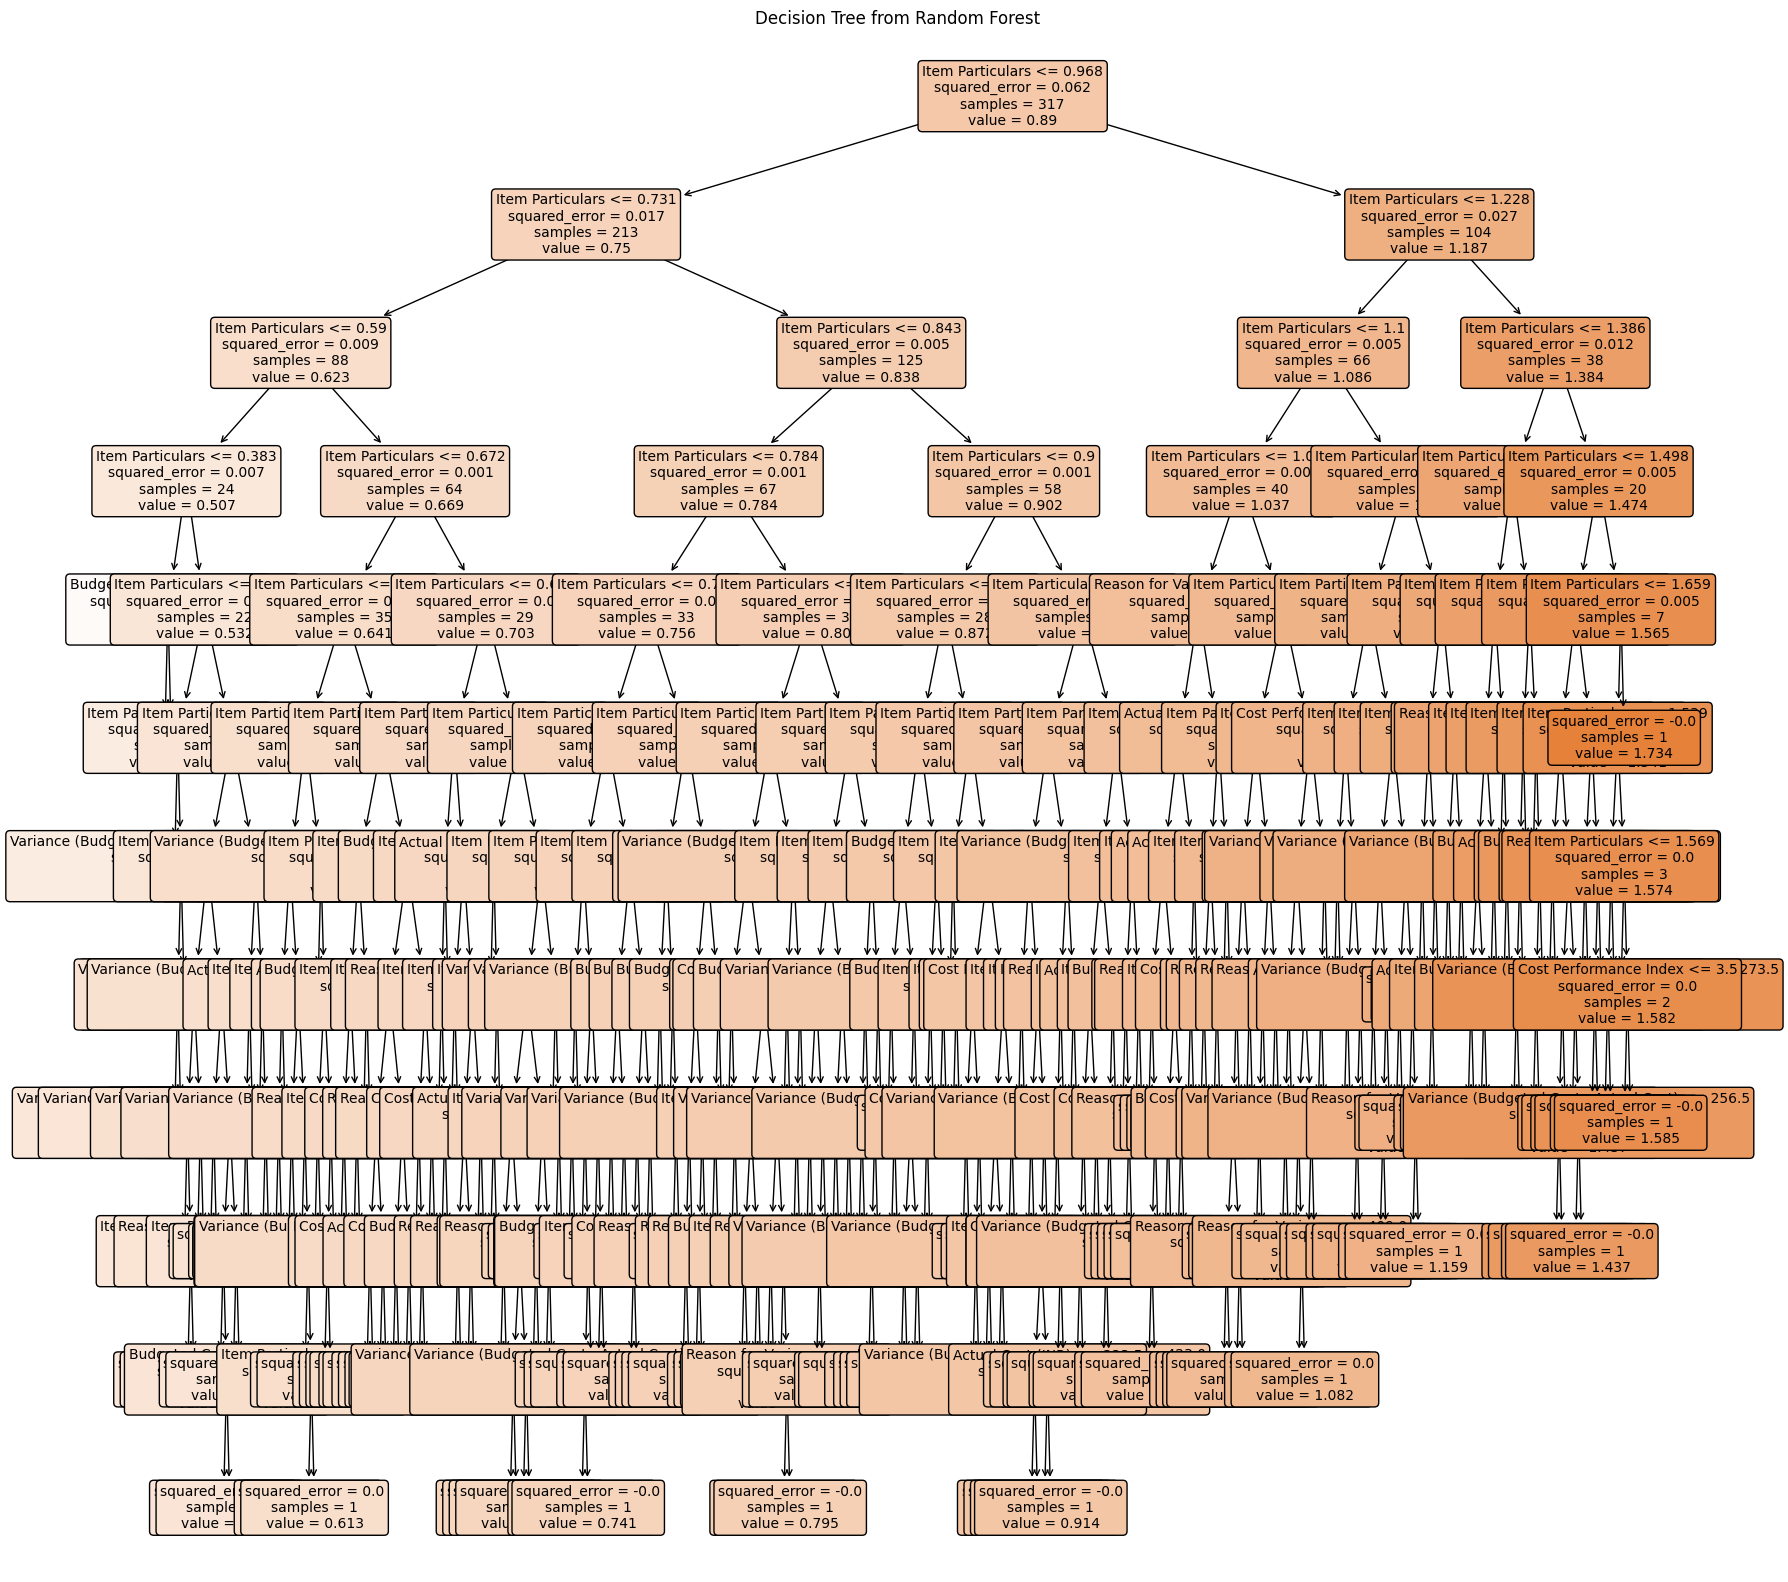

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree_to_plot = regressor.estimators_[0]
plt.figure(figsize=(19,20))
plot_tree(tree_to_plot,feature_names=df.columns.tolist(),filled=True,rounded=1,fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [ ]:
data

,Item Particulars,Budgeted Cost (INR),Actual Cost (INR),Variance (Budgeted Cost - Actual Cost),Reason for Variance,Cost Performance Index
0,17,503,483,346,7,0.999063
1,18,481,481,332,3,0.910749
2,19,33,476,473,2,1.658726
3,14,21,26,174,6,0.847270
4,1,327,400,178,6,0.625798
...,...,...,...,...,...,...
499,16,473,473,345,5,0.908182
500,15,318,386,43,1,0.752324
501,6,122,180,316,0,0.714532
502,2,303,301,286,4,0.879777


In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.ensemble import RandomForestRegressor as RFR

In [ ]:
array = data.values
X = array[:,0:5]
Y = array[:,5]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.50, random_state=1)
model = KNR()

In [ ]:
model.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
import pickle
filename = "model.pk1"
pickle.dump(model, open(filename, 'wb')) #wb is write binary

In [ ]:
loaded_model = pickle.load(open(filename, 'rb')) #rb is read binary
result = loaded_model.score (X_validation, Y_validation)
print(result)

0.7990668464263362


In [ ]:
value = [[18, 481, 481, 332, 3]]
predictions = model.predict(value)
print(predictions[0])

0.9902152000000001


In [ ]:
array = data.values
X = array[:,0:5]
Y = array[:,5]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.50, random_state=1)
model = RFR()

In [ ]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
import pickle
filename = "model.pk1"
pickle.dump(model, open(filename, 'wb')) #wb is write binary

In [ ]:
loaded_model = pickle.load(open(filename, 'rb')) #rb is read binary
result = loaded_model.score (X_validation, Y_validation)
print(result)

0.7909971047839016


In [ ]:
value = [[18, 481, 481, 332, 3]]
predictions = model.predict(value)
print(predictions[0])

0.8646964899999996
